In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

# 1. Load Polymer Dataset

In [5]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [6]:
!gdown 1ad3kJ5Zrxekn1yH7rhB7lFAfkYS-0Wzt

Downloading...
From: https://drive.google.com/uc?id=1ad3kJ5Zrxekn1yH7rhB7lFAfkYS-0Wzt
To: C:\Users\Gopinath\Python stuff\Polymer_Eea_data.csv

  0%|          | 0.00/103k [00:00<?, ?B/s]
100%|##########| 103k/103k [00:00<00:00, 435kB/s]
100%|##########| 103k/103k [00:00<00:00, 435kB/s]


In [7]:
data=pd.read_csv('Polymer_Eea_data.csv')
data.head()

,smiles,Eea,mfp_MQNs13,mfp_MQNs14,mfp_MQNs15,mfp_MQNs16,mfp_MQNs17,mfp_MQNs18,mfp_MQNs19,mfp_MQNs20,...,mfp_NumAromaticRings,mfp_NumAliphaticRings,mfp_Chi0n,mfp_Chi0v,mfp_Chi1n,mfp_Chi1v,mfp_Chi2n,mfp_Chi2v,mfp_HallKierAlpha,mfp_tpsa
0,[*]CC([*])C,0.4343,0.909091,0.0,0,0.0,0.0,0,0.181818,0.0,...,0.0,0,0.863636,0.136364,0.409091,0.045455,0.011364,0.011364,0.00000,0.0
1,[*]CC([*])F,0.8740,0.875000,0.0,0,0.0,0.0,0,0.125000,0.0,...,0.0,0,0.797246,0.172246,0.367373,0.054873,0.011811,0.011811,0.00875,0.0
2,[*]CC([*])(F)F,1.1415,0.875000,0.0,0,0.0,0.0,0,0.125000,0.0,...,0.0,0,0.719491,0.219491,0.328496,0.078496,0.032551,0.032551,0.01750,0.0
3,[*]C(F)C([*])(F)F,1.5240,0.875000,0.0,0,0.0,0.0,0,0.125000,0.0,...,0.0,0,0.641737,0.266737,0.289618,0.102118,0.044363,0.044363,0.02625,0.0
4,[*]CCC(F)(F)C([*])(F)F,0.4489,0.928571,0.0,0,0.0,0.0,0,0.214286,0.0,...,0.0,0,0.679418,0.250847,0.321852,0.107566,0.068557,0.068557,0.02000,0.0


In [8]:
Xcols = data.columns[data.columns.str.contains("mfp_")]
Xcols

Index(['mfp_MQNs13', 'mfp_MQNs14', 'mfp_MQNs15', 'mfp_MQNs16', 'mfp_MQNs17',
       'mfp_MQNs18', 'mfp_MQNs19', 'mfp_MQNs20', 'mfp_MQNs21', 'mfp_MQNs22',
       'mfp_MQNs23', 'mfp_MQNs24', 'mfp_MQNs25', 'mfp_MQNs26', 'mfp_MQNs27',
       'mfp_MQNs28', 'mfp_MQNs29', 'mfp_MQNs30', 'mfp_MQNs31', 'mfp_MQNs32',
       'mfp_MQNs33', 'mfp_MQNs34', 'mfp_MQNs35', 'mfp_MQNs36', 'mfp_MQNs37',
       'mfp_MQNs38', 'mfp_MQNs39', 'mfp_MQNs40', 'mfp_MQNs41', 'mfp_MQNs42',
       'mfp_NumAromaticRings', 'mfp_NumAliphaticRings', 'mfp_Chi0n',
       'mfp_Chi0v', 'mfp_Chi1n', 'mfp_Chi1v', 'mfp_Chi2n', 'mfp_Chi2v',
       'mfp_HallKierAlpha', 'mfp_tpsa'],
      dtype='object')

In [9]:
y=data['Eea']
X=data[Xcols]

# 2. Visualize Data

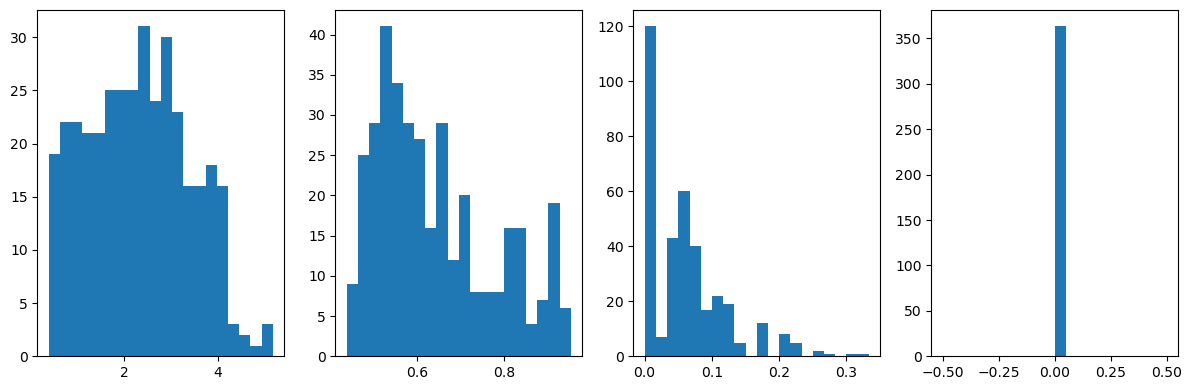

In [10]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(12,4))

ax1.hist(y.values, bins=20)
ax2.hist(X.values[:,0], bins=20)
ax3.hist(X.values[:,1], bins=20)
ax4.hist(X.values[:,2], bins=20)

plt.tight_layout()

# 3. Fit Model Linear Model

In [11]:
lin_reg = LinearRegression()
model = lin_reg.fit(X,y)
y_pred = model.predict(X)

# 4. Assess model accuracy

In [12]:
mse = mean_squared_error(y, y_pred)
print("Mean squared error: %.2f" % mse)

r2 = r2_score(y, y_pred)
# The r2 score: 1 is perfect prediction
print("r2 score: %.2f" % r2)

Mean squared error: 0.16
r2 score: 0.87


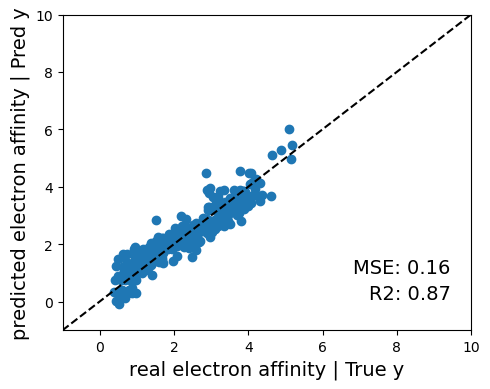

In [13]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax1.scatter(y,y_pred)
ax1.plot([-1,11], [-1,11], '--k')

ax1.set_xlabel('real electron affinity | True y', fontsize=14)
ax1.set_ylabel('predicted electron affinity | Pred y', fontsize=14)

ax1.text(0.95, 0.18, "MSE: %.2f"%mse, transform=ax1.transAxes, ha='right', fontsize=14)
ax1.text(0.95, 0.1, "R2: %.2f"%r2, transform=ax1.transAxes, ha='right', fontsize=14)

ax1.set_xlim([-1,10])
ax1.set_ylim([-1,10])

plt.tight_layout()
plt.show()

In [14]:
y_avg_pred = [y.mean()]*len(y)
print("Mean squared error: %.2f" % mean_squared_error(y, y_avg_pred))

print("Coefficient of determination: %.2f" % r2_score(y, y_avg_pred))

Mean squared error: 1.19
Coefficient of determination: 0.00


# 5. Splitting the data into Train and Validation set

In [15]:
from sklearn.model_selection import KFold

In [16]:
kf = KFold(n_splits=2)

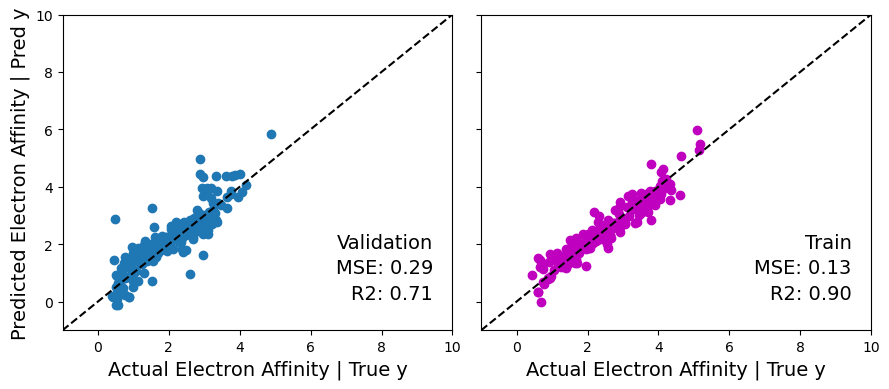

Mean squared error: 0.29
Coefficient of determination: 0.71


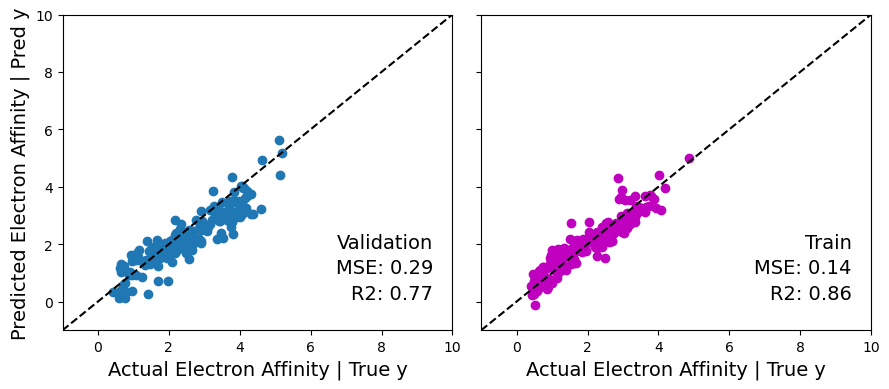

Mean squared error: 0.29
Coefficient of determination: 0.77


In [17]:
for train, val in kf.split(X):
    X_cv_train = X.values[train]
    X_cv_val = X.values[val]

    y_cv_train = y.values[train]
    y_cv_val = y.values[val]
    
    
    # Model fit and prediction
    model = lin_reg.fit(X_cv_train,y_cv_train)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)


    # Computing errors
    mse_val = mean_squared_error(y_cv_val, y_pred_val)
    mse_train = mean_squared_error(y_cv_train, y_pred_train)

    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    
    # Plot Parity plot
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4), sharey=True, sharex=True)
    ax1.scatter(y_cv_val,y_pred_val)
    ax1.text(0.95, 0.26, "Validation", transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.text(0.95, 0.18, "MSE: %.2f"%mse_val, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.1, "R2: %.2f"%r2_val, transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.plot([-1,11], [-1,11], '--k')

    ax2.scatter(y_cv_train,y_pred_train, c='m')
    ax2.text(0.95, 0.26, "Train", transform=ax2.transAxes, ha='right', fontsize=14)        
    ax2.text(0.95, 0.18, "MSE: %.2f"%mse_train, transform=ax2.transAxes, ha='right', fontsize=14)    
    ax2.text(0.95, 0.1, "R2: %.2f"%r2_train, transform=ax2.transAxes, ha='right', fontsize=14)        
    ax2.plot([-1,11], [-1,11], '--k')

    ax1.set_xlabel('Actual Electron Affinity | True y', fontsize=14)
    ax2.set_xlabel('Actual Electron Affinity | True y', fontsize=14)    
    ax1.set_ylabel('Predicted Electron Affinity | Pred y', fontsize=14)

    ax1.set_xlim([-1,10])
    ax1.set_ylim([-1,10])

    plt.tight_layout()
    plt.show()

    print("Mean squared error: %.2f" % mse_val)
    print("Coefficient of determination: %.2f" % r2_val) 

In [18]:
train

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# 6. Five Fold cross validation

In [42]:
def plot_parity(y_cv_val,y_pred_val, y_cv_train,y_pred_train):
    # Plot Parity plot
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4), sharey=True, sharex=True)
    ax1.scatter(y_cv_val,y_pred_val)
    ax1.text(0.95, 0.34, "Validation", transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.26, "NVal: %s"%len(y_cv_val), transform=ax1.transAxes, ha='right', fontsize=14)        
    ax1.text(0.95, 0.18, "MSE: %.2f"%mse_val, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.1, "R2: %.2f"%r2_val, transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.plot([-1,11], [-1,11], '--k')

    ax2.scatter(y_cv_train,y_pred_train, c='m')
    ax2.text(0.95, 0.34, "Train", transform=ax2.transAxes, ha='right', fontsize=14)
    ax2.text(0.95, 0.26, "NTrain: %s"%len(y_cv_train), transform=ax2.transAxes, ha='right', fontsize=14)            
    ax2.text(0.95, 0.18, "MSE: %.2f"%mse_train, transform=ax2.transAxes, ha='right', fontsize=14)    
    ax2.text(0.95, 0.1, "R2: %.2f"%r2_train, transform=ax2.transAxes, ha='right', fontsize=14)        
    ax2.plot([-1,11], [-1,11], '--k')

    ax1.set_xlabel('Actual Electron Affinity | True y', fontsize=14)
    ax2.set_xlabel('Actual Electron Affinity | True y', fontsize=14)    
    ax1.set_ylabel('Predicted Electron Affinity | Pred y', fontsize=14)

    ax1.set_xlim([-1,10])
    ax1.set_ylim([-1,10])

    plt.tight_layout()
    plt.show()
    
    return None

In [20]:
kf = KFold(n_splits=5)

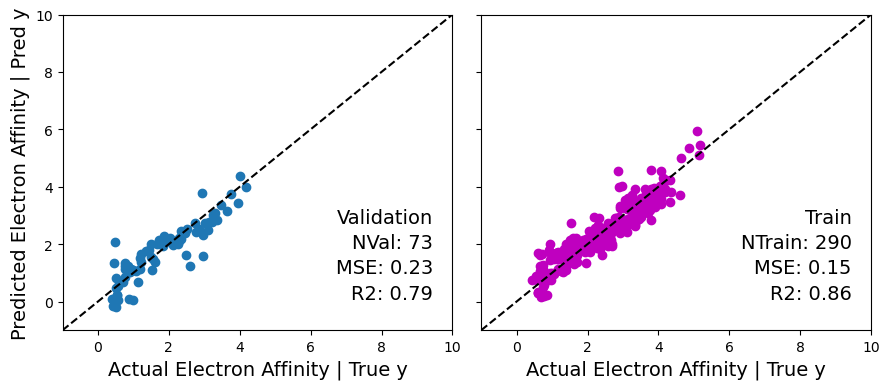

Mean squared error: 0.23
Coefficient of determination: 0.79


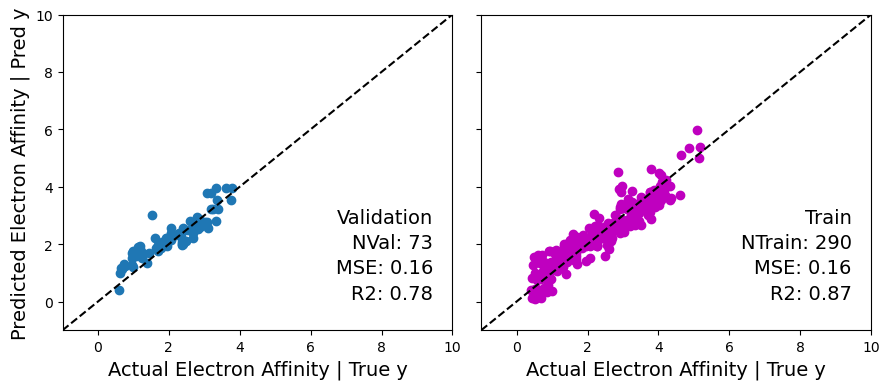

Mean squared error: 0.16
Coefficient of determination: 0.78


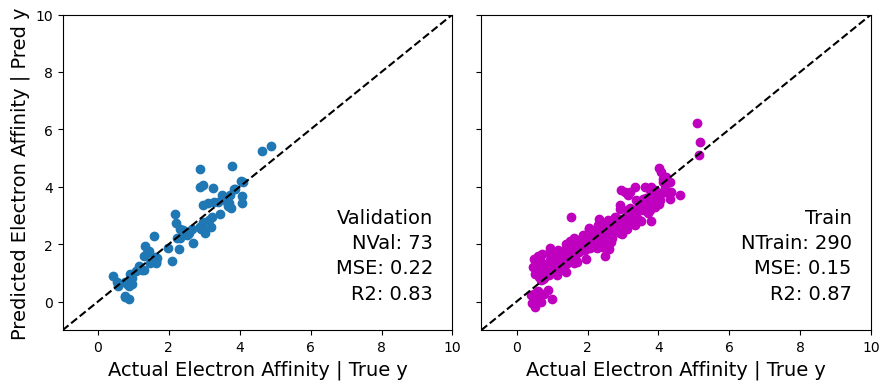

Mean squared error: 0.22
Coefficient of determination: 0.83


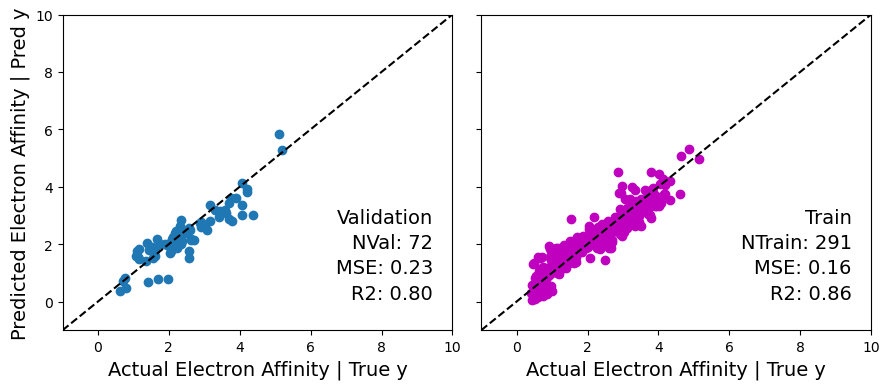

Mean squared error: 0.23
Coefficient of determination: 0.80


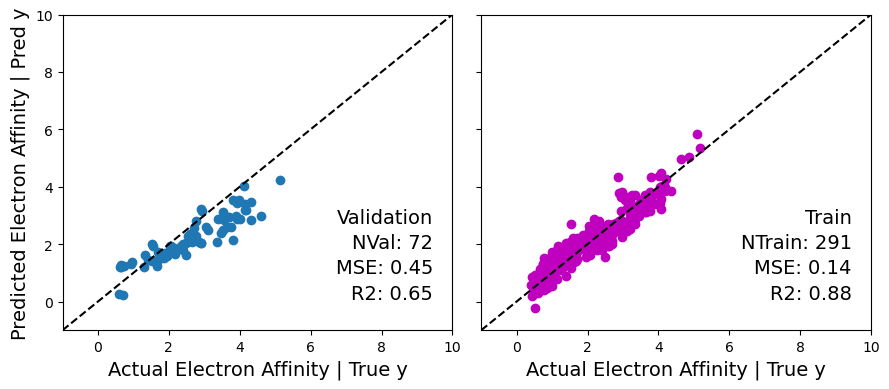

Mean squared error: 0.45
Coefficient of determination: 0.65


In [43]:
errors = []

for idx, (train, val) in enumerate(kf.split(X)):
    X_cv_train = X.values[train]
    X_cv_val = X.values[val]

    y_cv_train = y.values[train]
    y_cv_val = y.values[val]
    
    
    # Model fit and prediction
    model = lin_reg.fit(X_cv_train,y_cv_train)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)


    # Computing errors
    mse_val = mean_squared_error(y_cv_val, y_pred_val)
    mse_train = mean_squared_error(y_cv_train, y_pred_train)

    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    
    # Plot Parity plot
    plot_parity(y_cv_val,y_pred_val, y_cv_train,y_pred_train)

    print("Mean squared error: %.2f" % mse_val)
    print("Coefficient of determination: %.2f" % r2_val) 
    
    error = {'kfold': idx+1,
             'mse_train': mse_train,
             'mse_val': mse_val,
             'r2_val': r2_val,
             'r2_train': r2_train}

    errors.append(error)

In [22]:
errors = pd.DataFrame(errors)
errors

,kfold,mse_train,mse_val,r2_val,r2_train
0,1,0.154673,0.233495,0.790959,0.864478
1,2,0.161805,0.163418,0.782630,0.874210
2,3,0.150351,0.217905,0.830414,0.870157
3,4,0.162532,0.228770,0.795427,0.863717
4,5,0.136242,0.451402,0.646501,0.879380


In [23]:
errors.mean()[['mse_val','r2_val']]

mse_val    0.258998
r2_val     0.769186
dtype: float64

# 7. Regularization to prevent overfitting

In [24]:
lr_l2 = Ridge(alpha=1)

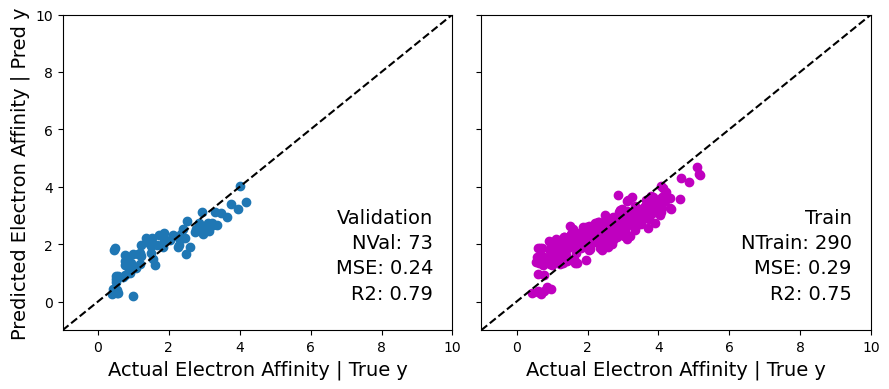

Mean squared error: 0.24
Coefficient of determination: 0.79


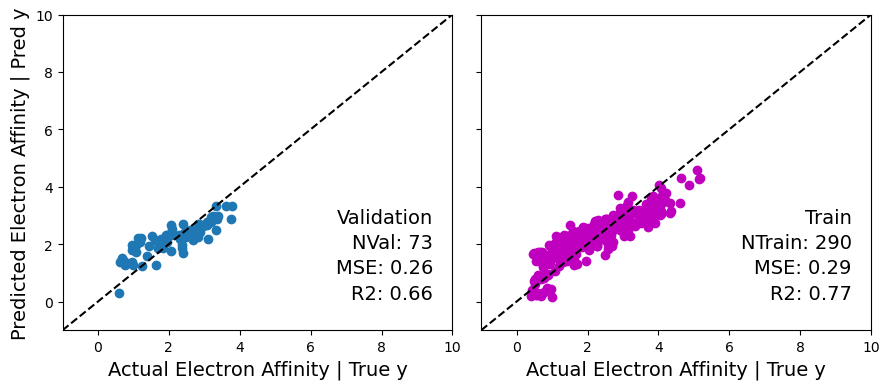

Mean squared error: 0.26
Coefficient of determination: 0.66


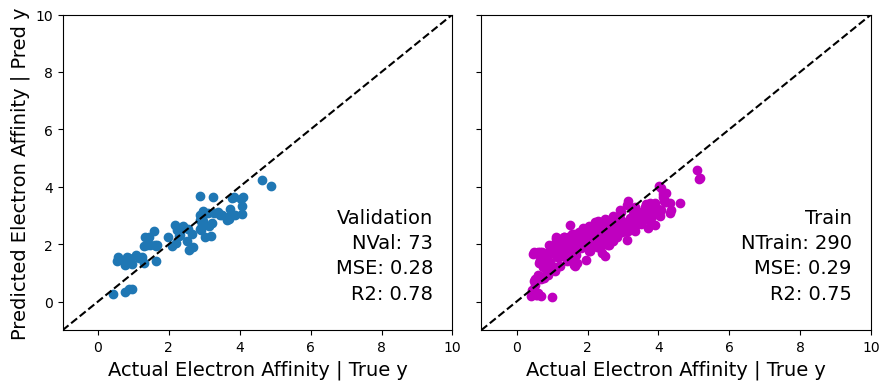

Mean squared error: 0.28
Coefficient of determination: 0.78


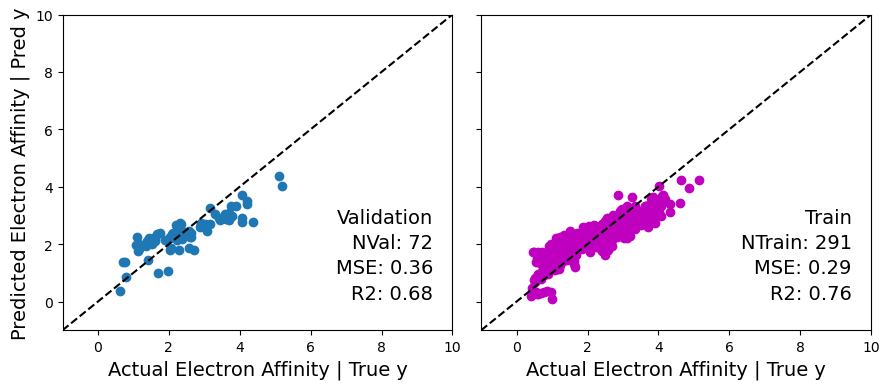

Mean squared error: 0.36
Coefficient of determination: 0.68


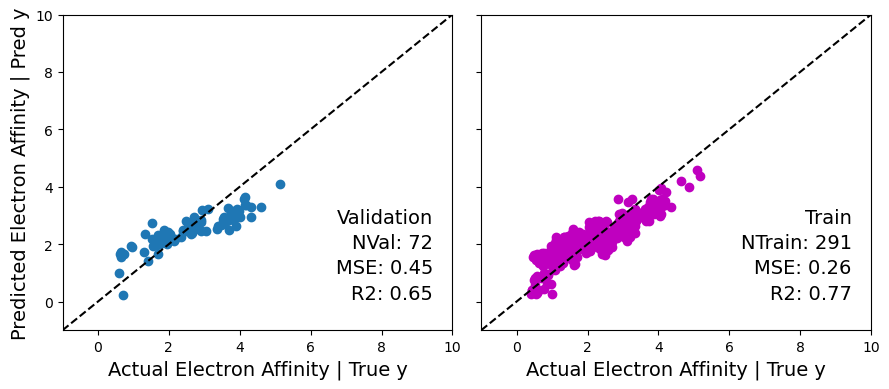

Mean squared error: 0.45
Coefficient of determination: 0.65


In [44]:
errors_l2 = []

for idx, (train, val) in enumerate(kf.split(X)):
    X_cv_train = X.values[train]
    X_cv_val = X.values[val]

    y_cv_train = y.values[train]
    y_cv_val = y.values[val]
    
    
    # Model fit and prediction
    model = lr_l2.fit(X_cv_train,y_cv_train)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)


    # Computing errors
    mse_val = mean_squared_error(y_cv_val, y_pred_val)
    mse_train = mean_squared_error(y_cv_train, y_pred_train)

    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    
    # Plot Parity plot
    plot_parity(y_cv_val,y_pred_val, y_cv_train,y_pred_train)

    print("Mean squared error: %.2f" % mse_val)
    print("Coefficient of determination: %.2f" % r2_val) 
    
    error = {'kfold': idx+1,
             'mse_train': mse_train,
             'mse_val': mse_val,
             'r2_val': r2_val,
             'r2_train': r2_train}

    errors_l2.append(error)
errors_l2 = pd.DataFrame(errors_l2)

In [26]:
errors_l2.mean()[['mse_val','r2_val']]

mse_val    0.317188
r2_val     0.710564
dtype: float64

In [27]:
errors.mean()[['mse_val','r2_val']]

mse_val    0.258998
r2_val     0.769186
dtype: float64

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
c_values = [0.00001, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 10, 100]
hyper_params = {'alpha':c_values}

In [30]:
lr_ridge = Ridge()
clf = GridSearchCV(lr_ridge, hyper_params, cv=5, scoring='neg_mean_squared_error')

In [31]:
_ = clf.fit(X,y)

In [32]:
mse_list = clf.cv_results_['mean_test_score']*-1
mse_list

array([0.2444665 , 0.24240226, 0.24323875, 0.23466102, 0.23100264,
       0.24023784, 0.26633732, 0.29235025, 0.31718795, 0.785415  ,
       1.16453669])

Text(0, 0.5, 'MSE')

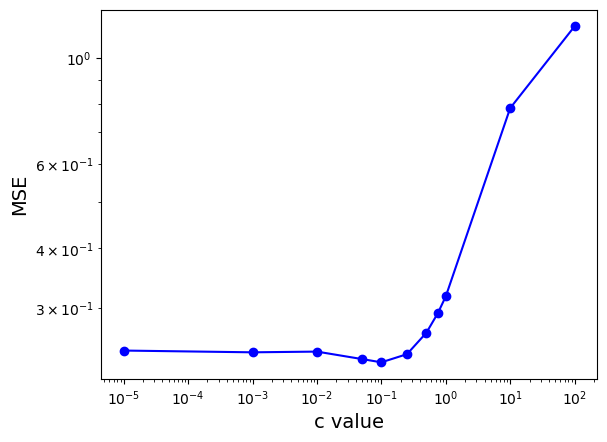

In [33]:
plt.plot(c_values, mse_list, '-bo')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('c value', fontsize=14)
plt.ylabel('MSE', fontsize=14)

In [34]:
mse_list

array([0.2444665 , 0.24240226, 0.24323875, 0.23466102, 0.23100264,
       0.24023784, 0.26633732, 0.29235025, 0.31718795, 0.785415  ,
       1.16453669])

In [35]:
min_idx = np.argmin(mse_list)
c_values[min_idx], mse_list[min_idx]

(0.1, 0.23100264261490971)

In [36]:
lr_ridge_c_opt = Ridge(alpha=c_values[min_idx])

In [37]:
errors_l2_c_opt = []

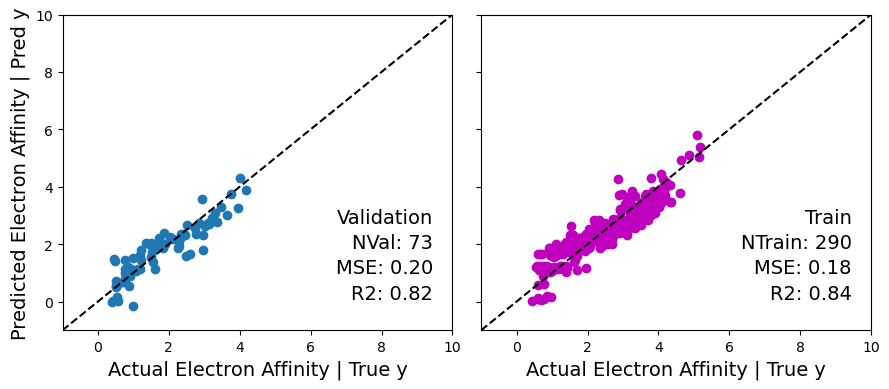

Mean squared error: 0.20
Coefficient of determination: 0.82


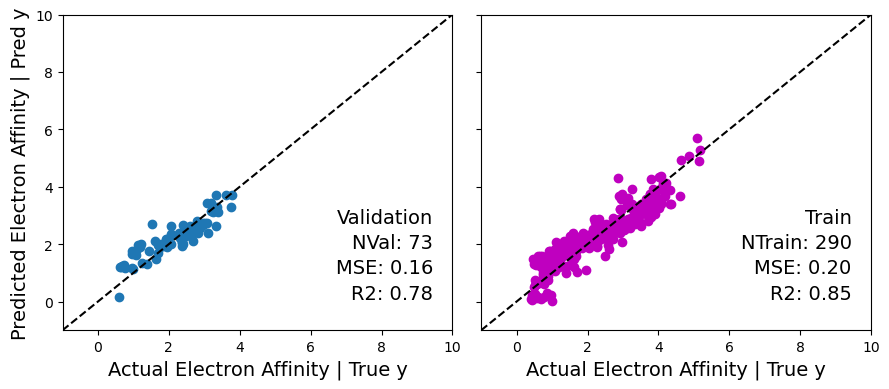

Mean squared error: 0.16
Coefficient of determination: 0.78


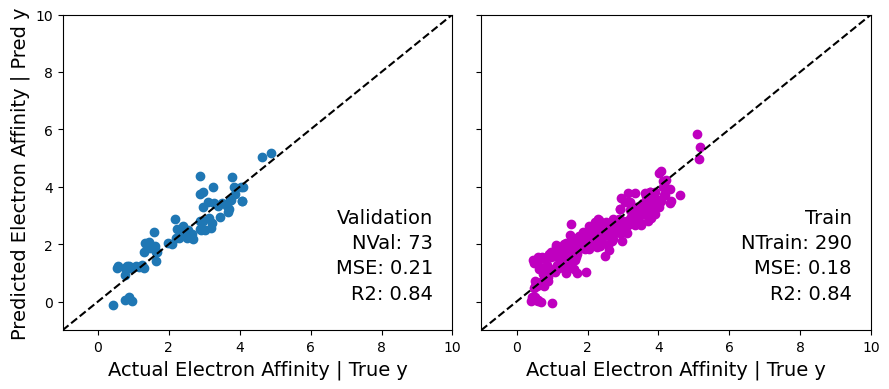

Mean squared error: 0.21
Coefficient of determination: 0.84


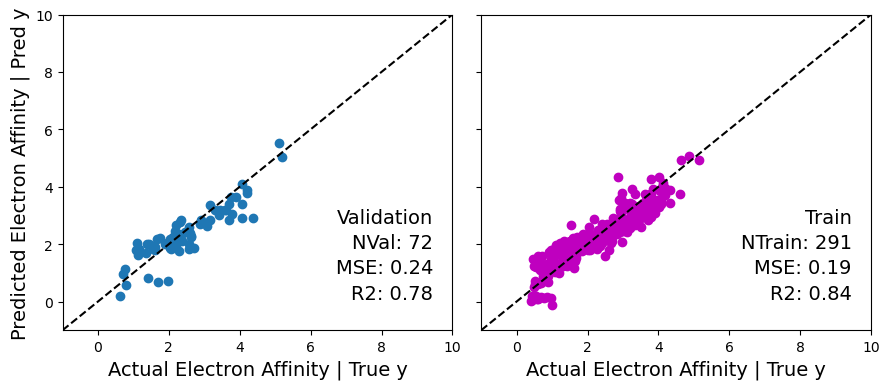

Mean squared error: 0.24
Coefficient of determination: 0.78


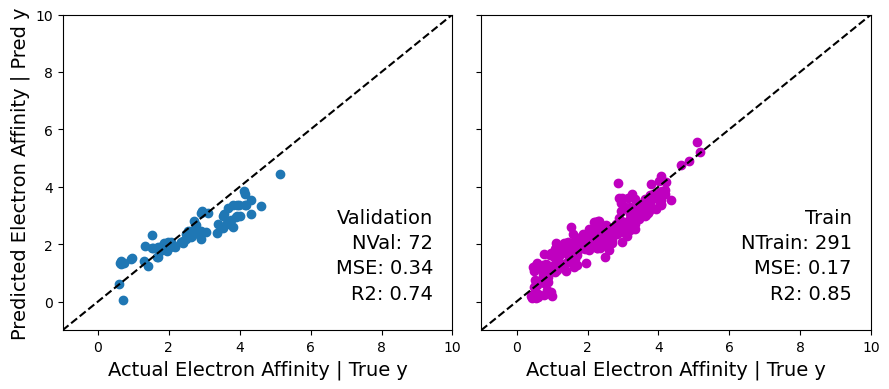

Mean squared error: 0.34
Coefficient of determination: 0.74


In [45]:
for idx, (train, val) in enumerate(kf.split(X)):
    X_cv_train = X.values[train]
    X_cv_val = X.values[val]

    y_cv_train = y.values[train]
    y_cv_val = y.values[val]

    model = lr_ridge_c_opt.fit(X_cv_train,y_cv_train)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)

    mse_val = mean_squared_error(y_cv_val, y_pred_val)
    mse_train = mean_squared_error(y_cv_train, y_pred_train)

    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)

    plot_parity(y_cv_val,y_pred_val, y_cv_train,y_pred_train)

    print("Mean squared error: %.2f" % mse_val)
    print("Coefficient of determination: %.2f" % r2_val)

    error = {'kfold': idx+1,
             'mse_train': mse_train,
             'mse_val': mse_val,
             'r2_val': r2_val,
             'r2_train': r2_train}

    errors_l2_c_opt.append(error)
errors_l2_c_opt = pd.DataFrame(errors_l2_c_opt)

In [46]:
errors_l2_c_opt.mean()[['mse_val','r2_val']]

mse_val    0.231003
r2_val     0.791405
dtype: float64

In [47]:
errors_l2.mean()[['mse_val','r2_val']]

mse_val    0.317188
r2_val     0.710564
dtype: float64

# 8. Feature selection for performance improvement

In [48]:
from sklearn.feature_selection import RFECV

In [50]:
lr_l2_rfe = Ridge(alpha=c_values[min_idx])
selector = RFECV(lr_l2_rfe, step=1, cv=5, scoring='neg_mean_squared_error')
selector = selector.fit(X, y)

In [51]:
sel_features = Xcols[selector.support_]

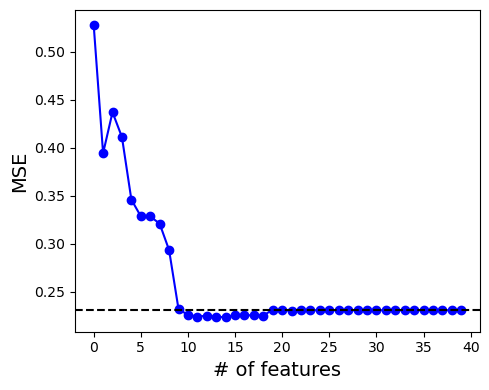

In [52]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax1.plot(selector.cv_results_['mean_test_score']*-1, '-bo')
ax1.axhline(errors_l2_c_opt.mean()['mse_val'], linestyle='--', color='k')
ax1.set_xlabel('# of features', fontsize=14)
ax1.set_ylabel('MSE', fontsize=14)
plt.tight_layout()

In [53]:
print("Initial number of features", selector.n_features_in_)
print("Selected number of features", selector.n_features_)

Initial number of features 40
Selected number of features 15


In [54]:
mse_rfe = (selector.cv_results_['mean_test_score']*-1).min()
print("Mean square error with RFE (eV^2): ", mse_rfe)

Mean square error with RFE (eV^2):  0.2238091250684922


# 9. Plot errors of all datas

AttributeError: 'list' object has no attribute 'mean'

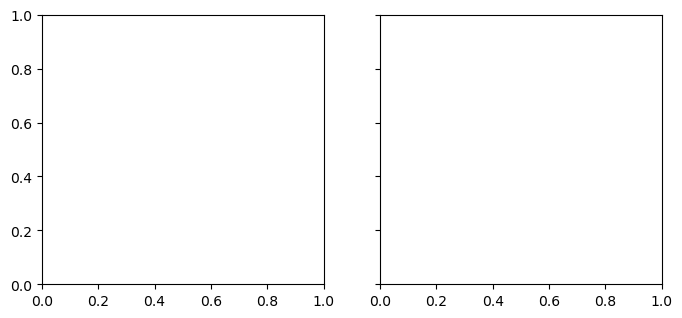

In [56]:
width = 0.1
labels = ['linear','linear + l2','linear + l2 + copt', 'linear + l2 + copt + RFE']
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,3.5), sharey=True)
    
for idx,e in enumerate([errors, errors_l2, errors_l2_c_opt]):
    mse = e.mean()['mse_val']
    r2 = e.mean()['r2_val']
    
    ax1.barh(0 + width*(idx-1), mse, height=width, label=labels[idx], align='center')
    ax2.barh(0 + width*(idx-1), r2, height=width, label=labels[idx], align='center')    

ax1.barh(0 + width*(idx), mse_rfe, height=width, label=labels[idx], align='center')
#ax2.barh(0 + width*(idx-1), r2, height=width, label=labels[idx], align='center')    
    
ax1.set_xlabel('MSE', fontsize=14)
ax2.set_xlabel('R2', fontsize=14)    

ax1.set_yticks([-0.1,0, 0.1, 0.2])
ax1.set_yticklabels(labels)

#ax1.set_ylim(-0.2,0.3)
#ax1.set_xlim(0.7,0.85)
#ax2.set_xlim(0.4,0.6)

plt.tight_layout()
plt.show()



In [57]:
weights = selector.estimator_.coef_
order = np.argsort(-1 * np.abs(weights))

In [58]:
print(order)

[ 1  0 12  4  3 14  5  2  6  8  9  7 13 10 11]


In [59]:
sel_features

Index(['mfp_MQNs13', 'mfp_MQNs14', 'mfp_MQNs16', 'mfp_MQNs19', 'mfp_MQNs21',
       'mfp_MQNs26', 'mfp_MQNs28', 'mfp_MQNs29', 'mfp_MQNs30', 'mfp_MQNs35',
       'mfp_MQNs36', 'mfp_NumAromaticRings', 'mfp_Chi0v', 'mfp_Chi1v',
       'mfp_HallKierAlpha'],
      dtype='object')

In [60]:
sel_features[order]

Index(['mfp_MQNs14', 'mfp_MQNs13', 'mfp_Chi0v', 'mfp_MQNs21', 'mfp_MQNs19',
       'mfp_HallKierAlpha', 'mfp_MQNs26', 'mfp_MQNs16', 'mfp_MQNs28',
       'mfp_MQNs30', 'mfp_MQNs35', 'mfp_MQNs29', 'mfp_Chi1v', 'mfp_MQNs36',
       'mfp_NumAromaticRings'],
      dtype='object')

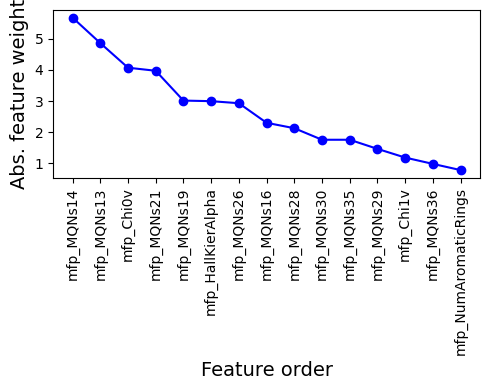

In [61]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax1.plot(range(1,len(sel_features)+1), np.abs(weights[order]), '-bo')
ax1.set_xlabel('Feature order', fontsize=14)
ax1.set_ylabel('Abs. feature weight', fontsize=14)

ax1.set_xticks(range(1,len(sel_features)+1))
ax1.set_xticklabels(sel_features[order], rotation=90)

plt.tight_layout()

# 11. Prediction for new polymers

In [62]:
!gdown 18ElqEaHzRHUAFiFSVlWjMg7I3qrRrNmw

Downloading...
From: https://drive.google.com/uc?id=18ElqEaHzRHUAFiFSVlWjMg7I3qrRrNmw
To: C:\Users\Gopinath\Python stuff\Polymer_Eg_testdata.csv

  0%|          | 0.00/5.03k [00:00<?, ?B/s]
100%|##########| 5.03k/5.03k [00:00<?, ?B/s]


In [63]:
test_data=pd.read_csv('Polymer_Eg_testdata.csv')
test_data.head()

,smiles,mfp_MQNs13,mfp_MQNs14,mfp_MQNs15,mfp_MQNs16,mfp_MQNs17,mfp_MQNs18,mfp_MQNs19,mfp_MQNs20,mfp_MQNs21,...,mfp_NumAromaticRings,mfp_NumAliphaticRings,mfp_Chi0n,mfp_Chi0v,mfp_Chi1n,mfp_Chi1v,mfp_Chi2n,mfp_Chi2v,mfp_HallKierAlpha,mfp_tpsa
0,[*]CC([*])c1ccc(C(=O)CCN2CCOCC2)cc1,0.692308,0.025641,0.0,0.230769,0.076923,0.0,0.153846,0.128205,0.076923,...,0.025641,0.025641,0.763172,0.224711,0.385466,0.116236,0.071952,0.071952,0.030513,0.189359
1,[*]C(=O)OCCCCOC(=O)N1CCN([*])CC1,0.764706,0.058824,0.0,0.176471,0.000000,0.0,0.147059,0.294118,0.176471,...,0.000000,0.029412,0.750806,0.221395,0.368823,0.105670,0.055939,0.055939,0.038235,0.499044
2,[*]c1cc(CCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)F)c([*])s1,0.833333,0.000000,0.0,0.100000,0.066667,0.0,0.200000,0.000000,0.000000,...,0.033333,0.000000,0.610331,0.337548,0.303636,0.180853,0.113404,0.133817,0.031000,0.000000
3,[*]OC1C(C)(C)C([*])C1(C)C,0.840000,0.000000,0.0,0.160000,0.000000,0.0,0.200000,0.080000,0.040000,...,0.000000,0.040000,0.816330,0.176330,0.404495,0.088165,0.078165,0.078165,0.001600,0.202300
4,[*]NC(C)C(=O)NCC(=O)NCC([*])=O,0.846154,0.115385,0.0,0.000000,0.000000,0.0,0.269231,0.346154,0.230769,...,0.000000,0.000000,0.733323,0.233323,0.346895,0.105016,0.058007,0.058007,0.055000,0.973942


In [64]:
test_X = test_data[sel_features]
test_X

,mfp_MQNs13,mfp_MQNs14,mfp_MQNs16,mfp_MQNs19,mfp_MQNs21,mfp_MQNs26,mfp_MQNs28,mfp_MQNs29,mfp_MQNs30,mfp_MQNs35,mfp_MQNs36,mfp_NumAromaticRings,mfp_Chi0v,mfp_Chi1v,mfp_HallKierAlpha
0,0.692308,0.025641,0.230769,0.153846,0.076923,0.025641,0.025641,0.102564,0.025641,0.000000,0.051282,0.025641,0.224711,0.116236,0.030513
1,0.764706,0.058824,0.176471,0.147059,0.176471,0.058824,0.058824,0.117647,0.000000,0.000000,0.029412,0.000000,0.221395,0.105670,0.038235
2,0.833333,0.000000,0.100000,0.200000,0.000000,0.300000,0.000000,0.233333,0.033333,0.033333,0.000000,0.033333,0.337548,0.180853,0.031000
3,0.840000,0.000000,0.160000,0.200000,0.040000,0.000000,0.000000,0.160000,0.000000,0.000000,0.000000,0.000000,0.176330,0.088165,0.001600
4,0.846154,0.115385,0.000000,0.269231,0.230769,0.115385,0.230769,0.153846,0.000000,0.000000,0.000000,0.000000,0.233323,0.105016,0.055000
5,0.521739,0.043478,0.260870,0.086957,0.086957,0.043478,0.086957,0.000000,0.043478,0.043478,0.043478,0.086957,0.329574,0.191412,0.070000
6,0.666667,0.000000,0.166667,0.111111,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.055556,0.055556,0.348210,0.174105,0.011111
7,0.500000,0.045455,0.272727,0.136364,0.045455,0.045455,0.045455,0.000000,0.045455,0.045455,0.045455,0.090909,0.379897,0.217784,0.054091
8,0.788732,0.056338,0.084507,0.253521,0.112676,0.056338,0.070423,0.169014,0.000000,0.000000,0.028169,0.028169,0.243732,0.123723,0.051831
9,0.833333,0.083333,0.000000,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.062500,0.021667


In [65]:
pred_test_y = selector.estimator_.predict(test_X.values)
pred_test_y

array([1.12307386, 0.80837094, 2.0011446 , 0.36510273, 1.7388121 ,
       2.31058603, 2.26487697, 2.90736396, 1.45394977, 1.51217575])

Text(0.5, 0, 'Polymer ID')

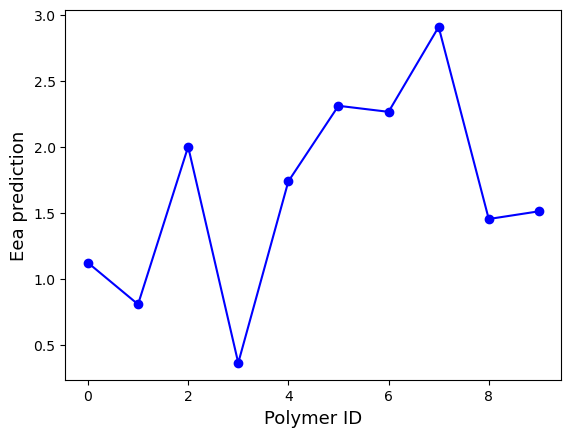

In [66]:
plt.plot(pred_test_y, '-bo')
plt.ylabel('Eea prediction', fontsize=13)
plt.xlabel('Polymer ID', fontsize=13)

In [67]:
test_data['predicted_Eea_values']=pred_test_y
test_data

,smiles,mfp_MQNs13,mfp_MQNs14,mfp_MQNs15,mfp_MQNs16,mfp_MQNs17,mfp_MQNs18,mfp_MQNs19,mfp_MQNs20,mfp_MQNs21,...,mfp_NumAliphaticRings,mfp_Chi0n,mfp_Chi0v,mfp_Chi1n,mfp_Chi1v,mfp_Chi2n,mfp_Chi2v,mfp_HallKierAlpha,mfp_tpsa,predicted_Eea_values
0,[*]CC([*])c1ccc(C(=O)CCN2CCOCC2)cc1,0.692308,0.025641,0.0,0.230769,0.076923,0.0,0.153846,0.128205,0.076923,...,0.025641,0.763172,0.224711,0.385466,0.116236,0.071952,0.071952,0.030513,0.189359,1.123074
1,[*]C(=O)OCCCCOC(=O)N1CCN([*])CC1,0.764706,0.058824,0.0,0.176471,0.000000,0.0,0.147059,0.294118,0.176471,...,0.029412,0.750806,0.221395,0.368823,0.105670,0.055939,0.055939,0.038235,0.499044,0.808371
2,[*]c1cc(CCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)F)c([*])s1,0.833333,0.000000,0.0,0.100000,0.066667,0.0,0.200000,0.000000,0.000000,...,0.000000,0.610331,0.337548,0.303636,0.180853,0.113404,0.133817,0.031000,0.000000,2.001145
3,[*]OC1C(C)(C)C([*])C1(C)C,0.840000,0.000000,0.0,0.160000,0.000000,0.0,0.200000,0.080000,0.040000,...,0.040000,0.816330,0.176330,0.404495,0.088165,0.078165,0.078165,0.001600,0.202300,0.365103
4,[*]NC(C)C(=O)NCC(=O)NCC([*])=O,0.846154,0.115385,0.0,0.000000,0.000000,0.0,0.269231,0.346154,0.230769,...,0.000000,0.733323,0.233323,0.346895,0.105016,0.058007,0.058007,0.055000,0.973942,1.738812
5,[*]NC(=O)C(S1)=CC=C1C(C=C2)=CC=C2[*],0.521739,0.043478,0.0,0.260870,0.217391,0.0,0.086957,0.130435,0.086957,...,0.000000,0.685379,0.329574,0.346974,0.191412,0.100672,0.145047,0.070000,0.468370,2.310586
6,[*]CCc1ccc([*])c(Cl)c1Cl,0.666667,0.000000,0.0,0.166667,0.166667,0.0,0.111111,0.000000,0.000000,...,0.000000,0.708663,0.348210,0.354331,0.174105,0.083498,0.125494,0.011111,0.000000,2.264877
7,[*]C(C=C1)=CC=C1C(=S)C(S2)=CC=C2O[*],0.500000,0.045455,0.0,0.272727,0.227273,0.0,0.136364,0.090909,0.045455,...,0.000000,0.669307,0.379897,0.339761,0.217784,0.104444,0.167690,0.054091,0.229886,2.907364
8,[*]Oc1ccc(CC(NC(=O)CCc2ccc(OC(=O)CCCCCCC([*])=...,0.788732,0.056338,0.0,0.084507,0.084507,0.0,0.253521,0.211268,0.112676,...,0.000000,0.736689,0.243732,0.368166,0.123723,0.074394,0.074394,0.051831,0.419014,1.453950
9,[*]CC([*])C=C,0.833333,0.083333,0.0,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,...,0.000000,0.833333,0.166667,0.395833,0.062500,0.020833,0.020833,0.021667,0.000000,1.512176


In [68]:
from google.colab import files

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
test_data.to_csv('predicted_Eea_values.csv',index=False)
files.download('predicted_Eea_values.csv')

# Questions

#### 1.Notice we use small letter "y" and capital letter "X" to represent our target property and materials fingeprints respectively. Is there any particular reason for representing one with small and the other with capital alphabet?
This is because it adheres to accepted practices in linear algebra and machine learning. Now let's examine one.
a. The target property, y, is frequently either a vector (if predicting numerous samples at once) or a scalar (such as a property being predicted for a single material). Lowercase letters are commonly used to denote scalars and single-dimensional numbers in mathematical notation.
b. Material fingerprints (X) are frequently shown as vectors or matrices. In linear algebra, matrices are typically represented using capital letters.

#### 2. What is the use of visualizing target property and features data?
There are various reasons to visualize the target property and characteristics data:
a. Identifies any abnormalities or outliers that might require attention.
b. Analyzes the target property and feature distributions (such as skewness and normality) to determine their eligibility for particular machine learning techniques and their degree of variability.
c. After modeling, comparing predictions to actual values might show where the model is overfitting or performing poorly.

#### 3. Do you see any notable difference in the range of the different features? Is it expected? Can this have any consequences in the learning of the model?
Yes, it is common to observe differences in the range of features, and it is important to understand this in the context of machine learning:
a. Because features may have different units, sizes, or distributions depending on the qualities being measured, differences in feature ranges are frequently predicted.
b. The model may underemphasize features with lower ranges as a result of features with greater ranges controlling the learning process.
c. Unscaled features may cause slower convergence or make it more difficult to discover the best solution in gradient descent techniques.

#### 4. Why is it important to compare model performance with a baseline model?
An important part of machine learning is comparing a model's performance to that of a baseline model.
a. A baseline model offers a straightforward and understandable performance reference point.
b. It is difficult to determine whether a model's performance is truly good or only somewhat better than trivial solutions or random guessing in the absence of a baseline.
c. Comparing with a baseline helps determine whether the added complexity is justified by significant performance improvements.

#### 5. Is there any issue with the way we have computed the accuracy/ performance of the linear regression model?
some issues do exist:

Overfitting: The accuracy of the model is calculated using the same training dataset (X and Y). Because the model has already seen this data, it may produce performance estimates that are too optimistic.

Absence of Validation: The model's capacity to generalize to new data cannot be assessed without dividing the data into training and testing sets (or employing cross-validation).

#### 6. Why error on train set is consistently lower than that on test set?
During learning, the model explicitly optimizes weights for the training data. Training error is reduced as a result of this familiarity.
The test error, on the other hand, represents the model's capacity for generalization and usually results in a bigger error because the test data is not visible during training.
If Overfitting Occurs: An excessively intricate model could fit the training set too precisely, identifying patterns in the noise. Low training error and high test error are frequently the outcomes of this.

#### 7. We notice that error on the training and test set is different. Further, the error on test set 1 and test set 2 is also different. Which is the correct value that best estimate the performance of the ML model?      
The average test error across several splits or folds is the most accurate indicator of model performance. This is the reason:

Variability in Splits: The way the data is split affects the test errors. The model's exposure to various subsets of training and test data is reflected in this fluctuation.

Bias Reduction: An unduly optimistic or pessimistic performance assessment could be produced by a single split.

Cross-Validation: This method provides a reliable assessment of generalization performance by averaging mistakes across folds, which lessens the effect of any one split.

#### 8. Depending on the test-train split, the test errors are different. What number should we pick to estimate model performance?
Mean Performance: A reliable indicator of model performance is the mean of the test errors over a number of splits (obtained through repeated splits or cross-validation).
Uncertainty (variation): To show the variation in performance, report the standard deviation or confidence interval. For example:
Average: 5.2 ± 0.3
Average R2 is 0.85 [0.82,0.88].

#### 9. Within the same linear regression learning framework, what can be done to further improve the model performane? Can we manipulate the features to make learning easy?
Feature engineering: The process of applying domain expertise to develop new features or modify current ones.
Feature Selection: To keep just pertinent features, apply Recursive Feature Elimination (RFE) or alternative methods.

Normalization/Scaling: To enhance model learning, make sure all features have a comparable scale.

Higher-order polynomial characteristics or interaction can be added to capture non-linear relationships.

Outlier Detection and Removal: To enhance model fit, locate and manage data outliers.
